importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import scipy.integrate as integrate
from scipy.optimize import fsolve
from matplotlib.collections import LineCollection

specifying Times New Roman font and to force that withing plotting commands

In [2]:
tnr = "Times New Roman"
plt.rcParams['font.sans-serif'] = tnr
plt.rcParams['font.family'] = tnr
params ={'mathtext.default':'regular'}          
plt.rcParams.update(params)

forcing solid negative contour lines that are dashed by default

In [3]:
plt.rcParams['contour.negative_linestyle'] = 'solid'

setting user defined parameters

In [4]:
R_star = 1.e7 # km
V_inf = 2250. # km/s
beta = 1.0001
M_lossrate = 2*(10**(30))*1.e-6 # kg/s
R_shock = 1.5*R_star
T_star = 2.
u_o = R_star/R_shock
maxratio = 8. # max ratio of r/R_star on the grid, so that the grid plotted are scaled by R_star
q = 0.

setting up the grid

In [5]:
interval = 50
x = np.linspace(-maxratio, maxratio, interval)
y = np.linspace(-maxratio, maxratio, interval)   
X, Y = np.meshgrid(x, y)

function that computes radial velocity over terminal velocity on the grid

In [6]:
def f(x, y):
    r = np.sqrt(x**2+y**2)
    v = (1-1/r)**beta
    return (x/r)*v

function that computes the intensity proportional to density squared on the grid

In [7]:
def g(x, y):
    r = np.sqrt(x**2+y**2)
    v = (V_inf/R_star)*(1-1/r)**beta
    return -(np.log10((M_lossrate/(4*np.pi*(r**2)*v))**2))

funtion that computes the optical depth

In [8]:
op = []
for i in (y):
    arr = []
    if i < -1 or i >1:
        for j in (x):
            arr.append(T_star*(integrate.quad(lambda a: 1/((a**2+i**2)*((1-1/np.sqrt(a**2+i**2))**beta)), -np.inf, j)[0]))
    if -1 <= i and i <= 1:
        for j in (x):
            if -np.sqrt(1-i**2) <= j:
                arr.append(np.inf)
            else:
                arr.append(T_star*(integrate.quad(lambda a: 1/((a**2+i**2)*((1-1/np.sqrt(a**2+i**2))**beta)), -np.inf, j)[0]))
    op.append(arr)

defining line intervals for u_crit visualization

In [9]:
level = 0.7
u_crit_level = fsolve(lambda x: ((1-x)**(beta))*((1-x**2)**0.5)-(1-(1-0.7**(1/beta)))**beta, 0.4)

x1, y1 = [0, 1/(1-level**(1/beta))], [0, 0] # Rx
x2, y2 = [0, maxratio], [1, 1] # wind occultation
x3, y3 = [0, maxratio], [-1, -1] # wind occultation
x4, y4 = [0, 0], [0, 1] # R_star
x5, y5 = [0, (1/u_crit_level)*np.cos(np.arcsin(u_crit_level))], [0, (1/u_crit_level)*np.sin(np.arcsin(u_crit_level))] # R_crit
x6, y6 = [0, (R_shock/R_star)*np.cos(np.pi/6)], [0, -(R_shock/R_star)*np.sin(np.pi/6)] # Ro

plotting

<ipython-input-6-cfa8969fd148>:3: RuntimeWarning: invalid value encountered in power
  v = (1-1/r)**beta


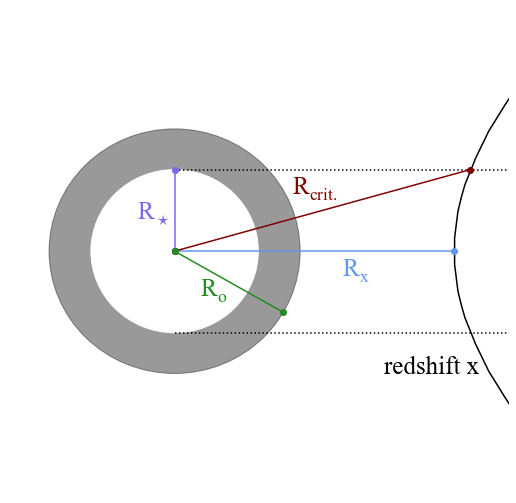

In [10]:
plt.figure(figsize = (9, 9))
plt.ylim(bottom = -3, top = 3)
plt.xlim(left = -2, right = 4)
plt.axis('off')

# drawing star and the stellar wind boundary

shock = plt.Circle((0, 0), R_shock/R_star, color='k', alpha = 0.4)
plt.gca().add_patch(shock)

star = plt.Circle((0,0), 1, color = 'white')
plt.gca().add_patch(star)

# drawing contour at x = level
color = f(X, Y)
redshift_contour = plt.contour(X, Y, color, levels = [level], colors = 'black')
plt.text(2.5, -1.5, 'redshift x', size = 25, color = 'black')


# drawing R_x
plt.plot(x1, y1, marker = 'o', color = 'cornflowerblue')
plt.text(2, -0.3, r'$R_x$', size = 25, color = 'cornflowerblue')

# drawing wind occultation
plt.plot(x2, y2, x3, y3, color = 'black', linestyle = ':')

# drawing R_star
plt.plot(x4, y4, marker = 'o', color = 'mediumslateblue')
plt.text(-0.45, 0.4, r'$R_\star$', size = 25, color = 'mediumslateblue')

# drawing R_crit
plt.plot(x5, y5, marker = 'o', color = 'maroon')
plt.text(1.4, 0.7, r'$R_{crit.}$', size = 25, color = 'maroon')

# drawing Ro
plt.plot(x6, y6, marker = 'o', color = 'forestgreen')
plt.text(0.3, -0.55, r'$R_o$', size = 25, color = 'forestgreen')

#plt.savefig('u_crit_derivation', bbox_inches = 'tight')
plt.show()


defining selected u and limits of x

In [11]:
u_level = 0.35

u_plot_x = np.linspace(-1/u_level, 1/u_level, 50000)
u_plot_y = (1/u_level**2-u_plot_x**2)**0.5

x_1 = -(1-u_level)**beta
x_2 = (1-u_level)**beta
x_3 = ((1-u_level)**beta)*(1-u_level**2)**0.5

plotting

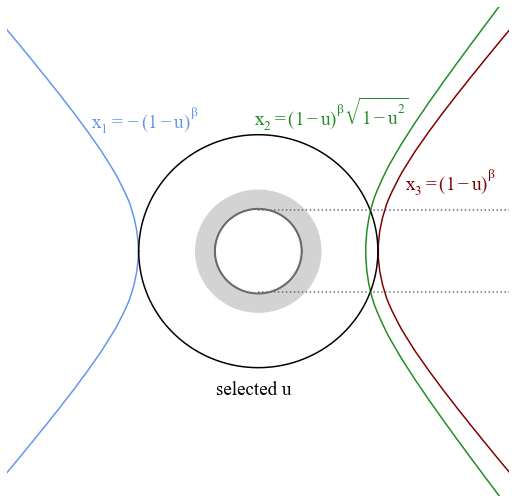

In [12]:
plt.figure(figsize = (9, 9))
plt.ylim(bottom = -6, top = 6)
plt.xlim(left = -6, right = 6)
plt.axis('off')


# drawing star and the stellar wind boundary

shock = plt.Circle((0, 0), R_shock/R_star, color='lightgray')
plt.gca().add_patch(shock)

star_bound = plt.Circle((0,0), 1.05, color = 'dimgray')
plt.gca().add_patch(star_bound)
star = plt.Circle((0,0), 1, color = 'white')
plt.gca().add_patch(star)


# drawing u of interest
plt.plot(u_plot_x, u_plot_y, 'k', lw = 1.5)
plt.plot(u_plot_x, -u_plot_y, 'k', lw = 1.5)
plt.text(-1, -3.5, 'selected u', size = 19, color = 'black')


# drawing wind occultation
plt.plot(x2, y2, x3, y3, color = 'dimgray', linestyle = ':')


# drawing contour u_x boundary
redshift_contour = plt.contour(X, Y, color, levels = [x_1], colors = 'cornflowerblue')
plt.text(-4, 3, r'$x_1 = -(1-u)^{\beta}$', size = 19, color = 'cornflowerblue')

redshift_contour = plt.contour(X, Y, color, levels = [x_2], colors = 'maroon')
plt.text(3.5, 1.5, r'$x_3 = (1-u)^{\beta}$', size = 19, color = 'maroon')


# drawing contour u_crit boundary
redshift_contour = plt.contour(X, Y, color, levels = [x_3], colors = 'forestgreen')
plt.text(-0.1, 3.1, r'$x_2 = (1-u)^{\beta}\sqrt{1-u^2}$', size = 19, color = 'forestgreen')


#plt.savefig('x_boundary_derivation', bbox_inches = 'tight')
plt.show()
